In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels import regression, stats
import matplotlib.pyplot as plt
import scipy as sp

def linreg(X,Y):
    x = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, x).fit()
    return model.params[0], model.params[1]

slope 0.009072503822685523 intercept -0.40207744085303826


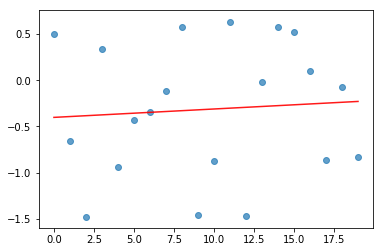

In [5]:
np.random.seed(107)
rand = np.random.randn(20)
xs = np.arange(20)
a,b = linreg(xs, rand)
print('slope', b, 'intercept', a)

plt.scatter(xs, rand, alpha=0.7)
Y_hat = xs * b + a
plt.plot(xs, Y_hat, 'r', alpha=0.9)

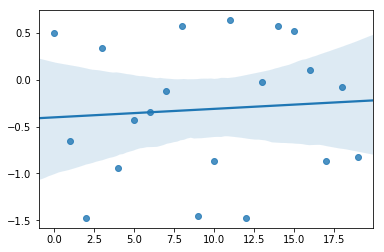

In [6]:
import seaborn
seaborn.regplot(xs, rand)

slope -0.0005693423631053349 intercept 0.009011767319021813


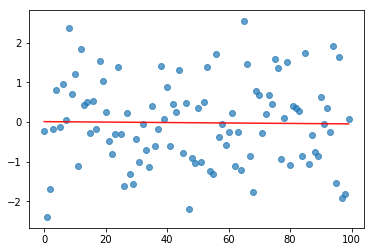

In [7]:
rand2 = np.random.randn(100)
xs2 = np.arange(100)
a2,b2 = linreg(xs2, rand2)
print('slope', b2, 'intercept', a2)

plt.scatter(xs2, rand2, alpha=0.7)
Y_hat2 = xs2 * b2 + a2
plt.plot(xs2, Y_hat2, 'r', alpha=0.9)

In [8]:
import pandas_datareader as pdr
from datetime import datetime

[   0    1    2 ... 1528 1529 1530] [   0    1    2 ... 1197 1198 1199] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228

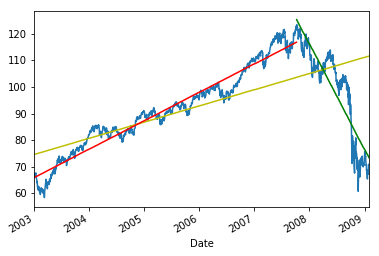

In [12]:
pricing = pdr.data.DataReader('SPY', data_source='yahoo', start=datetime(2003,1,1), end=datetime(2009,2,1)).iloc[:, -1]
returns = pricing.pct_change()[1:]

breakpoint=1200
xs = np.arange(len(pricing))
xs2 = np.arange(breakpoint)
xs3 = np.arange(len(pricing) - breakpoint)
print(xs,xs2,xs3)

a,b = linreg(xs, pricing)
a2,b2 = linreg(xs2, pricing.iloc[:breakpoint])
a3,b3 = linreg(xs3, pricing.iloc[breakpoint:])

Y_hat = pd.Series(xs *b + a, index = pricing.index)
Y_hat2 = pd.Series(xs2 *b2 + a2, index = pricing.index[:breakpoint])
Y_hat3 = pd.Series(xs3 *b3 + a3, index = pricing.index[breakpoint:])

pricing.plot()
Y_hat.plot(color='y')
Y_hat2.plot(color='r')
Y_hat3.plot(color='g')

In [14]:
stats.diagnostic.breaks_cusumolsresid(regression.linear_model.OLS(pricing, sm.add_constant(xs)).fit().resid)[1]

8.332546051059754e-59

Date
2013-01-02    129.093277
2013-01-03    128.801620
2013-01-04    129.367279
2013-01-07    129.013733
2013-01-08    128.642517
Name: Adj Close, dtype: float64
const   -16.787063
x1        0.298372
x2        0.072095
dtype: float64


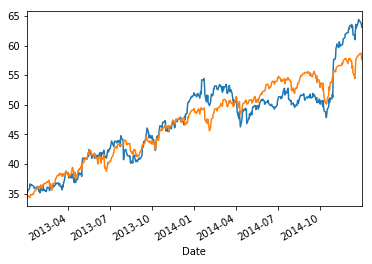

In [22]:
b1 = pdr.data.DataReader('SPY', data_source='yahoo', start=datetime(2013,1,1), end=datetime(2015,1,1)).iloc[:, -1]
b2 = pdr.data.DataReader('MDY', data_source='yahoo', start=datetime(2013,1,1), end=datetime(2015,1,1)).iloc[:, -1]
asset = pdr.data.DataReader('V', data_source='yahoo', start=datetime(2013,1,1), end=datetime(2015,1,1)).iloc[:, -1]
#sm.add_constant(b1)
print(b1.head())
mlr = regression.linear_model.OLS(asset, sm.add_constant(np.column_stack((b1, b2)))).fit()
prediction = mlr.params[0] + mlr.params[1] * b1 + mlr.params[2] * b2

print(mlr.params)

asset.plot()
prediction.plot()

Date
2013-01-02    129.093277
2013-01-03    128.801620
2013-01-04    129.367279
2013-01-07    129.013733
2013-01-08    128.642517
Name: Adj Close, dtype: float64
const   -28.581052
x1        0.243945
x2        0.168322
dtype: float64


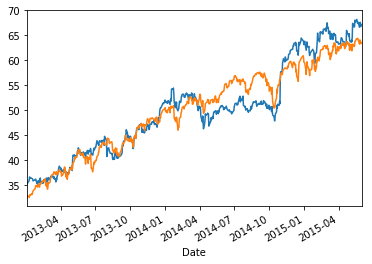

In [23]:
b1 = pdr.data.DataReader('SPY', data_source='yahoo', start=datetime(2013,1,1), end=datetime(2015,6,1)).iloc[:, -1]
b2 = pdr.data.DataReader('MDY', data_source='yahoo', start=datetime(2013,1,1), end=datetime(2015,6,1)).iloc[:, -1]
asset = pdr.data.DataReader('V', data_source='yahoo', start=datetime(2013,1,1), end=datetime(2015,6,1)).iloc[:, -1]
#sm.add_constant(b1)
print(b1.head())
mlr = regression.linear_model.OLS(asset, sm.add_constant(np.column_stack((b1, b2)))).fit()
prediction = mlr.params[0] + mlr.params[1] * b1 + mlr.params[2] * b2

print(mlr.params)

asset.plot()
prediction.plot()

In [24]:
sp.stats.pearsonr(b1, b2)
#case of multicollinearity

(0.9898093948529526, 0.0)